In [32]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation,Flatten
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

# データ作成

In [25]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()

In [26]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)

In [49]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 100

model_LSTM = Sequential()
model_LSTM.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model_LSTM.add(Dense(in_out_neurons))
model_LSTM.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model_LSTM.compile(loss="mean_squared_error", optimizer=optimizer)

In [51]:
model = Sequential()
model.add(Dense(64, batch_input_shape=(None, length_of_sequence, in_out_neurons)))
model.add(Dense(16))
model.add(Flatten())
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 0s 2ms/step - loss: 0.9868 - val_loss: 0.7354
Epoch 2/100
158/158 [==============================] - 0s 17us/step - loss: 0.9094 - val_loss: 0.6204
Epoch 3/100
158/158 [==============================] - 0s 16us/step - loss: 0.8278 - val_loss: 0.5156
Epoch 4/100
158/158 [==============================] - 0s 21us/step - loss: 0.7493 - val_loss: 0.4226
Epoch 5/100
158/158 [==============================] - 0s 14us/step - loss: 0.6755 - val_loss: 0.3411
Epoch 6/100
158/158 [==============================] - 0s 20us/step - loss: 0.6066 - val_loss: 0.2704
Epoch 7/100
158/158 [==============================] - 0s 14us/step - loss: 0.5425 - val_loss: 0.2102
Epoch 8/100
158/158 [==============================] - 0s 14us/step - loss: 0.4832 - val_loss: 0.1600
Epoch 9/100
158/158 [==============================] - 0s 14us/step - loss: 0.4286 - val_loss: 0.1195
Epoch 10/100
158/158 [================

In [53]:
predicted = model.predict(g)

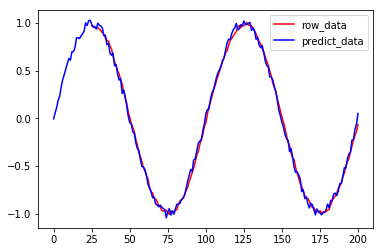

In [54]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.legend()
plt.show()

396


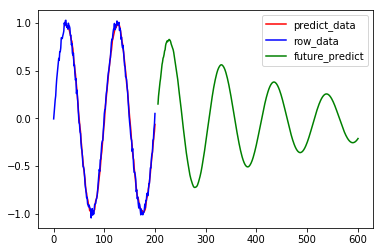

In [61]:
future_test = g[175].T
# 1つの学習データの時間の長さ -> 25
time_length = g.shape[1] 
# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)

future_result = future_result[5:]
print(len(future_result))
# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(5+len(f), len(future_result)+len(f)+5), future_result, color="g", label="future_predict")
plt.legend()
plt.show()


Train on 158 samples, validate on 18 samples
Epoch 1/100
158/158 [==============================] - 0s 259us/step - loss: 0.0013 - val_loss: 0.0013
Epoch 2/100
158/158 [==============================] - 0s 152us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/100
158/158 [==============================] - 0s 160us/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/100
158/158 [==============================] - 0s 154us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
158/158 [==============================] - 0s 160us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
158/158 [==============================] - 0s 153us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
158/158 [==============================] - 0s 163us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
158/158 [==============================] - 0s 160us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
158/158 [==============================] - 0s 150us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/100
158/158 [======

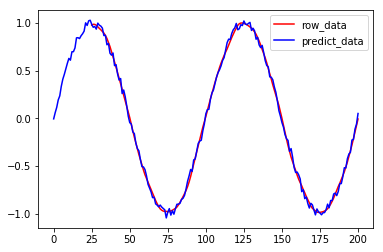

396


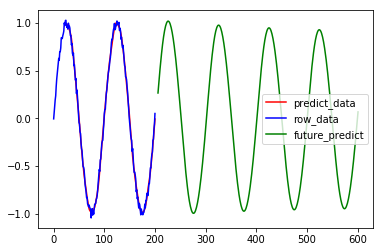

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model_LSTM.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping]
          )
predicted = model_LSTM.predict(g)

plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.legend()
plt.show()

future_test = g[175].T
# 1つの学習データの時間の長さ -> 25
time_length = g.shape[1] 
# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model_LSTM.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)

future_result = future_result[5:]
print(len(future_result))
# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(5+len(f), len(future_result)+len(f)+5), future_result, color="g", label="future_predict")
plt.legend()
plt.show()